<a href="https://colab.research.google.com/github/SanaSNavas27/finalproject/blob/main/Copy_of_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
df = pd.read_excel("/Data_final.xlsx",sheet_name="Sheet1" )

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            365 non-null    datetime64[ns]
 1   Black Carbon    365 non-null    float64       
 2   Dust            365 non-null    float64       
 3   Organic Carbon  365 non-null    float64       
 4   Sea Salt        365 non-null    float64       
 5   Sulfate         365 non-null    float64       
 6   AOD             365 non-null    float64       
 7   ARF_SUR         365 non-null    float64       
 8   ARF_TOA         365 non-null    float64       
 9   ARF_ATM         365 non-null    float64       
 10  1000            365 non-null    float64       
 11  925             365 non-null    float64       
 12  850             365 non-null    float64       
 13  700             365 non-null    float64       
 14  600             365 non-null    float64       
 15  500   

In [ ]:

df.describe()

,Black Carbon,Dust,Organic Carbon,Sea Salt,Sulfate,AOD,ARF_SUR,ARF_TOA,ARF_ATM,1000,...,30,20,15,10,7,5,3,2,1.5,1
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.004094,0.067148,0.044153,0.063657,0.132745,-54.358651,-14.960836,-9.406493,5.554343,299.510987,...,216.186547,221.863617,225.412517,229.652585,234.135486,240.185806,251.945928,259.718167,263.746750,266.666461
std,0.002080,0.056454,0.029978,0.063382,0.061204,739.173796,4.720051,3.301170,2.461923,0.870190,...,1.914048,2.036806,2.058559,2.133015,2.135796,2.382659,2.569534,2.538738,2.238581,1.670716
min,0.001314,0.005948,0.011167,0.010853,0.029978,-9999.000000,-32.564503,-21.498726,0.503516,297.060181,...,210.314804,215.918701,219.149292,220.952606,224.640335,231.160202,241.201813,250.305389,256.167938,262.425415
25%,0.002243,0.020751,0.020833,0.024340,0.086992,0.308454,-17.727561,-11.112164,3.668937,298.911652,...,214.831421,220.645370,224.176514,228.787582,233.168060,238.768280,250.377502,258.097443,262.388092,265.484253
50%,0.003673,0.049617,0.039398,0.034942,0.118708,0.397775,-14.320002,-8.941457,5.199706,299.485596,...,216.438141,222.091537,225.875031,230.038788,234.322006,240.174118,251.927597,259.588745,263.591034,266.521576
75%,0.005503,0.099260,0.056779,0.078001,0.158995,0.513658,-11.847508,-6.895610,7.035916,300.097382,...,217.761154,223.469208,226.869766,230.934418,235.447449,241.768845,253.566147,261.240570,265.051483,267.651520
max,0.009665,0.348149,0.185266,0.369686,0.373240,1.329046,-6.053989,-3.603367,13.823184,301.606415,...,219.388092,225.677139,229.852127,234.122894,239.171326,247.471039,258.359344,266.017914,269.569977,271.285217


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df['Date_Ordinal'] = df['Date'].apply(lambda x: x.toordinal())


In [ ]:
df=df.drop("Date",axis=1)

In [ ]:
df

,Black Carbon,Dust,Organic Carbon,Sea Salt,Sulfate,AOD,ARF_SUR,ARF_TOA,ARF_ATM,1000,...,20,15,10,7,5,3,2,1.5,1,Date_Ordinal
0,0.005958,0.019366,0.059087,0.024181,0.158504,0.344608,-13.037181,-7.806388,5.230792,297.142181,...,216.616531,219.711304,223.965424,229.254471,235.236984,245.154968,253.049850,258.576385,263.529602,735599
1,0.005628,0.020028,0.053890,0.018044,0.160012,0.373974,-13.547692,-7.789671,5.758022,297.413849,...,216.386108,219.240173,223.354080,228.856689,234.884354,243.855621,250.502563,256.167938,262.425415,735600
2,0.004598,0.017004,0.043461,0.010853,0.126752,0.301531,-12.147840,-6.527802,5.620038,297.789246,...,217.119888,220.852097,225.114441,229.480392,234.466049,243.765656,252.000412,257.922791,263.147552,735601
3,0.004868,0.014273,0.046138,0.012320,0.133098,0.290705,-12.318655,-6.350877,5.967778,298.414734,...,217.420197,220.026367,223.119965,227.903885,233.983765,243.941422,251.725067,257.598938,263.089050,735602
4,0.005733,0.011245,0.053947,0.018818,0.169862,0.389040,-14.356131,-7.684608,6.671523,298.637970,...,217.734009,220.608780,223.706390,227.432220,232.238388,242.293823,251.723312,258.130096,263.478363,735603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.006423,0.011213,0.057488,0.027432,0.183455,0.349617,-16.550813,-8.853442,7.697370,298.792999,...,219.861053,223.322815,227.610504,232.329285,238.035156,248.798538,256.825989,261.276367,264.744781,735959
361,0.005655,0.009095,0.051992,0.031687,0.158422,0.342717,-14.932888,-8.056430,6.876458,298.091278,...,219.009354,222.055603,226.289047,231.728333,238.192490,248.967102,256.758240,261.335815,264.879761,735960
362,0.004828,0.008534,0.044643,0.030084,0.122658,0.237448,-12.854040,-6.853519,6.000521,298.981293,...,219.866730,223.243073,227.258072,231.762146,237.178482,248.090103,256.894958,261.772125,265.269989,735961
363,0.003883,0.007434,0.037422,0.022482,0.084287,0.141873,-10.426218,-5.332359,5.093859,298.723358,...,219.919998,222.807053,226.033066,230.179153,236.168411,248.606171,257.677490,262.195923,265.298340,735962


In [ ]:
X = df.drop('AOD', axis=1)

# Target variable (dependent variable) - 'AOD'
y = df['AOD']

In [ ]:
X

,Black Carbon,Dust,Organic Carbon,Sea Salt,Sulfate,ARF_SUR,ARF_TOA,ARF_ATM,1000,925,...,20,15,10,7,5,3,2,1.5,1,Date_Ordinal
0,0.005958,0.019366,0.059087,0.024181,0.158504,-13.037181,-7.806388,5.230792,297.142181,291.341125,...,216.616531,219.711304,223.965424,229.254471,235.236984,245.154968,253.049850,258.576385,263.529602,735599
1,0.005628,0.020028,0.053890,0.018044,0.160012,-13.547692,-7.789671,5.758022,297.413849,293.003143,...,216.386108,219.240173,223.354080,228.856689,234.884354,243.855621,250.502563,256.167938,262.425415,735600
2,0.004598,0.017004,0.043461,0.010853,0.126752,-12.147840,-6.527802,5.620038,297.789246,292.960876,...,217.119888,220.852097,225.114441,229.480392,234.466049,243.765656,252.000412,257.922791,263.147552,735601
3,0.004868,0.014273,0.046138,0.012320,0.133098,-12.318655,-6.350877,5.967778,298.414734,294.767670,...,217.420197,220.026367,223.119965,227.903885,233.983765,243.941422,251.725067,257.598938,263.089050,735602
4,0.005733,0.011245,0.053947,0.018818,0.169862,-14.356131,-7.684608,6.671523,298.637970,294.052917,...,217.734009,220.608780,223.706390,227.432220,232.238388,242.293823,251.723312,258.130096,263.478363,735603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.006423,0.011213,0.057488,0.027432,0.183455,-16.550813,-8.853442,7.697370,298.792999,294.948212,...,219.861053,223.322815,227.610504,232.329285,238.035156,248.798538,256.825989,261.276367,264.744781,735959
361,0.005655,0.009095,0.051992,0.031687,0.158422,-14.932888,-8.056430,6.876458,298.091278,295.204071,...,219.009354,222.055603,226.289047,231.728333,238.192490,248.967102,256.758240,261.335815,264.879761,735960
362,0.004828,0.008534,0.044643,0.030084,0.122658,-12.854040,-6.853519,6.000521,298.981293,297.077759,...,219.866730,223.243073,227.258072,231.762146,237.178482,248.090103,256.894958,261.772125,265.269989,735961
363,0.003883,0.007434,0.037422,0.022482,0.084287,-10.426218,-5.332359,5.093859,298.723358,296.301056,...,219.919998,222.807053,226.033066,230.179153,236.168411,248.606171,257.677490,262.195923,265.298340,735962


In [ ]:
X = df.drop('AOD', axis=1)


# Target variable (dependent variable) - 'AOD'
y = df['AOD']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Black Carbon    365 non-null    float64
 1   Dust            365 non-null    float64
 2   Organic Carbon  365 non-null    float64
 3   Sea Salt        365 non-null    float64
 4   Sulfate         365 non-null    float64
 5   ARF_SUR         365 non-null    float64
 6   ARF_TOA         365 non-null    float64
 7   ARF_ATM         365 non-null    float64
 8   1000            365 non-null    float64
 9   925             365 non-null    float64
 10  850             365 non-null    float64
 11  700             365 non-null    float64
 12  600             365 non-null    float64
 13  500             365 non-null    float64
 14  400             365 non-null    float64
 15  300             365 non-null    float64
 16  250             365 non-null    float64
 17  200             365 non-null    flo

In [ ]:
y

0      0.344608
1      0.373974
2      0.301531
3      0.290705
4      0.389040
         ...   
360    0.349617
361    0.342717
362    0.237448
363    0.141873
364    0.211219
Name: AOD, Length: 365, dtype: float64

In [ ]:
df.columns

Index([  'Black Carbon',           'Dust', 'Organic Carbon',       'Sea Salt',
              'Sulfate',            'AOD',        'ARF_SUR',        'ARF_TOA',
              'ARF_ATM',             1000,              925,              850,
                    700,              600,              500,              400,
                    300,              250,              200,              150,
                    100,               70,               50,               30,
                     20,               15,               10,                7,
                      5,                3,                2,              1.5,
                      1,   'Date_Ordinal'],
      dtype='object')

In [ ]:
for column in df.columns:
    print(type(column))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'int'>
<class 'str'>


In [ ]:
X.columns = X.columns.astype(str)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and fit the linear regression model
model_l = LinearRegression()
model_l.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred_l = model_l.predict(X_test)

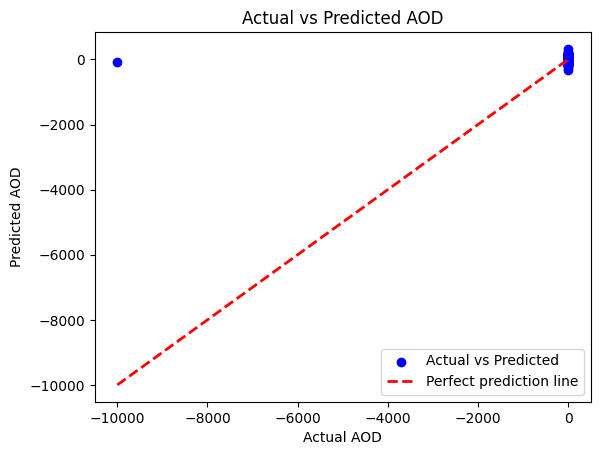

In [ ]:
# Visualize the results
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_l, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect prediction line')
plt.xlabel('Actual AOD')
plt.ylabel('Predicted AOD')
plt.legend()
plt.title('Actual vs Predicted AOD')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:

# Fit the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)

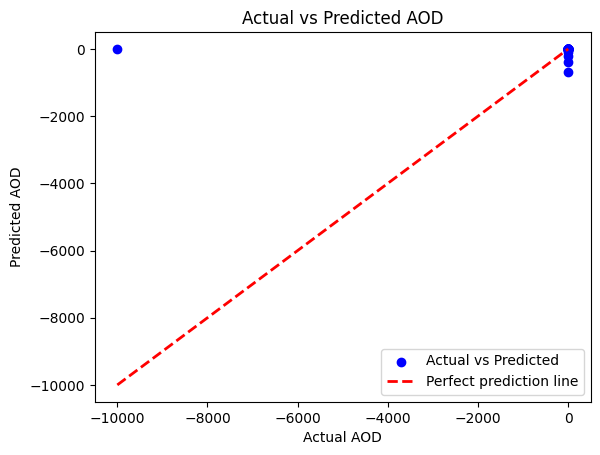

In [ ]:

plt.scatter(y_test, y_pred_rf, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect prediction line')
plt.xlabel('Actual AOD')
plt.ylabel('Predicted AOD')
plt.legend()
plt.title('Actual vs Predicted AOD')
plt.show()

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1379398.645081873


In [ ]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 1174.478030906442


In [ ]:
r2_value = r2_score(y_test, y_pred_rf)

# Print the R-squared value
print(f'R-squared value: {r2_value}')

R-squared value: -0.021066724777363044


In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_regressor = XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)

In [ ]:
# Fit the model
xgb_regressor.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions on the test set
y_pred_xgb = xgb_regressor.predict(X_test)



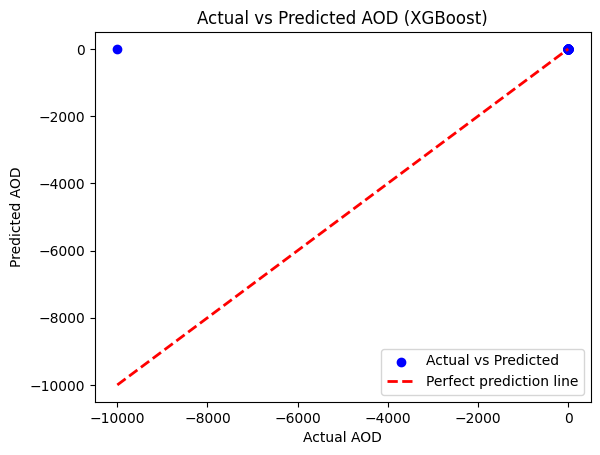

In [ ]:
# Visualize the results
plt.scatter(y_test, y_pred_xgb, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect prediction line')
plt.xlabel('Actual AOD')
plt.ylabel('Predicted AOD')
plt.legend()
plt.title('Actual vs Predicted AOD (XGBoost)')
plt.show()

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_xgb)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1369801.033551929


In [ ]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 1170.3849937315194


In [ ]:
r2_value = r2_score(y_test, y_pred_xgb)

# Print the R-squared value
print(f'R-squared value: {r2_value}')

R-squared value: -0.013962323301034418


In [ ]:
df_modified = df.drop(df[df['AOD'] < -1000].index, inplace = False)

<Axes: xlabel='Date_Ordinal'>

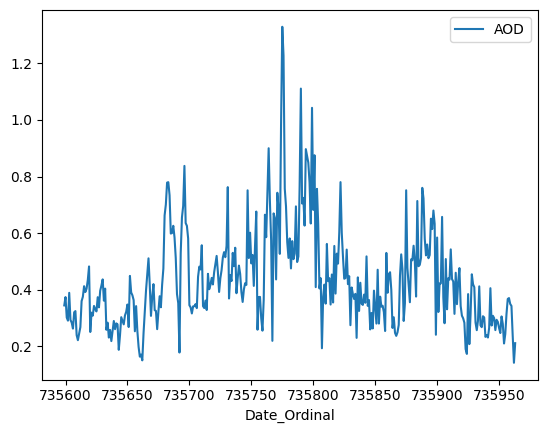

In [ ]:
df_modified.plot(x="Date_Ordinal", y="AOD")

In [ ]:
X.columns = X.columns.astype(str)

In [ ]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 364
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Black Carbon    363 non-null    float64
 1   Dust            363 non-null    float64
 2   Organic Carbon  363 non-null    float64
 3   Sea Salt        363 non-null    float64
 4   Sulfate         363 non-null    float64
 5   AOD             363 non-null    float64
 6   ARF_SUR         363 non-null    float64
 7   ARF_TOA         363 non-null    float64
 8   ARF_ATM         363 non-null    float64
 9   1000            363 non-null    float64
 10  925             363 non-null    float64
 11  850             363 non-null    float64
 12  700             363 non-null    float64
 13  600             363 non-null    float64
 14  500             363 non-null    float64
 15  400             363 non-null    float64
 16  300             363 non-null    float64
 17  250             363 non-null    flo

In [ ]:
X.columns = X.columns.astype(str)

In [ ]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 364
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Black Carbon    363 non-null    float64
 1   Dust            363 non-null    float64
 2   Organic Carbon  363 non-null    float64
 3   Sea Salt        363 non-null    float64
 4   Sulfate         363 non-null    float64
 5   AOD             363 non-null    float64
 6   ARF_SUR         363 non-null    float64
 7   ARF_TOA         363 non-null    float64
 8   ARF_ATM         363 non-null    float64
 9   1000            363 non-null    float64
 10  925             363 non-null    float64
 11  850             363 non-null    float64
 12  700             363 non-null    float64
 13  600             363 non-null    float64
 14  500             363 non-null    float64
 15  400             363 non-null    float64
 16  300             363 non-null    float64
 17  250             363 non-null    flo

In [ ]:
  X = df_modified.drop('AOD', axis=1)


# Target variable (dependent variable) - 'AOD'
y = df_modified['AOD']    # Dependent variable

In [ ]:
X.columns = X.columns.astype(str)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test)

In [ ]:
r2_value = r2_score(y_test, y_pred_lr)

# Print the R-squared value
print(f'R-squared value: {r2_value}')

R-squared value: 0.7387150567905065


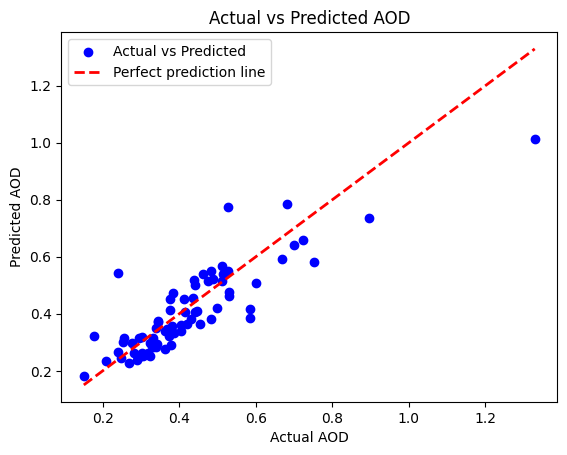

In [ ]:
# Visualize the results
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_lr, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect prediction line')
plt.xlabel('Actual AOD')
plt.ylabel('Predicted AOD')
plt.legend()
plt.title('Actual vs Predicted AOD')
plt.show()

In [ ]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 1170.3849937315194


In [ ]:
r2_value = r2_score(y_test, y_pred_lr)

# Print the R-squared value
print(f'R-squared value: {r2_value}')

R-squared value: 0.7387150567905065


In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Fit the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)

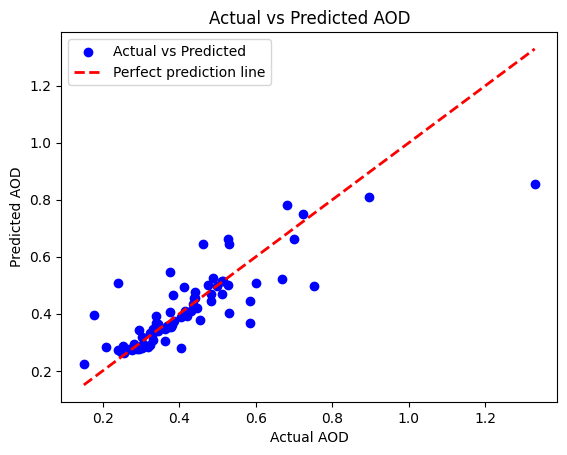

In [ ]:
plt.scatter(y_test, y_pred_rf, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect prediction line')
plt.xlabel('Actual AOD')
plt.ylabel('Predicted AOD')
plt.legend()
plt.title('Actual vs Predicted AOD')
plt.show()

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.009764986577481108


In [ ]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 0.09881794663663634


In [ ]:
r2_value = r2_score(y_test, y_pred_rf)

# Print the R-squared value
print(f'R-squared value: {r2_value}')


R-squared value: 0.681125773970239


In [ ]:
xgb_regressor = XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)

In [ ]:
# Fit the model
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:

# Make predictions on the test set
y_pred_xg = xgb_regressor.predict(X_test)

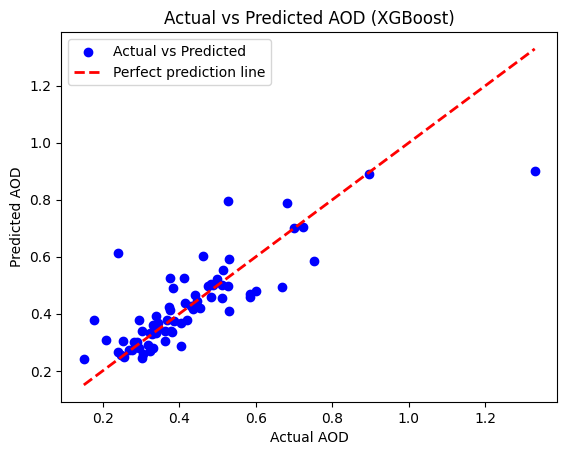

In [ ]:
# Visualize the results
plt.scatter(y_test, y_pred_xg, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect prediction line')
plt.xlabel('Actual AOD')
plt.ylabel('Predicted AOD')
plt.legend()
plt.title('Actual vs Predicted AOD (XGBoost)')
plt.show()

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_xg)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.009879918581718574


In [ ]:

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.09939777956130899


In [ ]:

r2_value = r2_score(y_test, y_pred_xg)

# Print the R-squared value
print(f'R-squared value: {r2_value}')

R-squared value: 0.6773726859750352


In [ ]:
import seaborn as sns

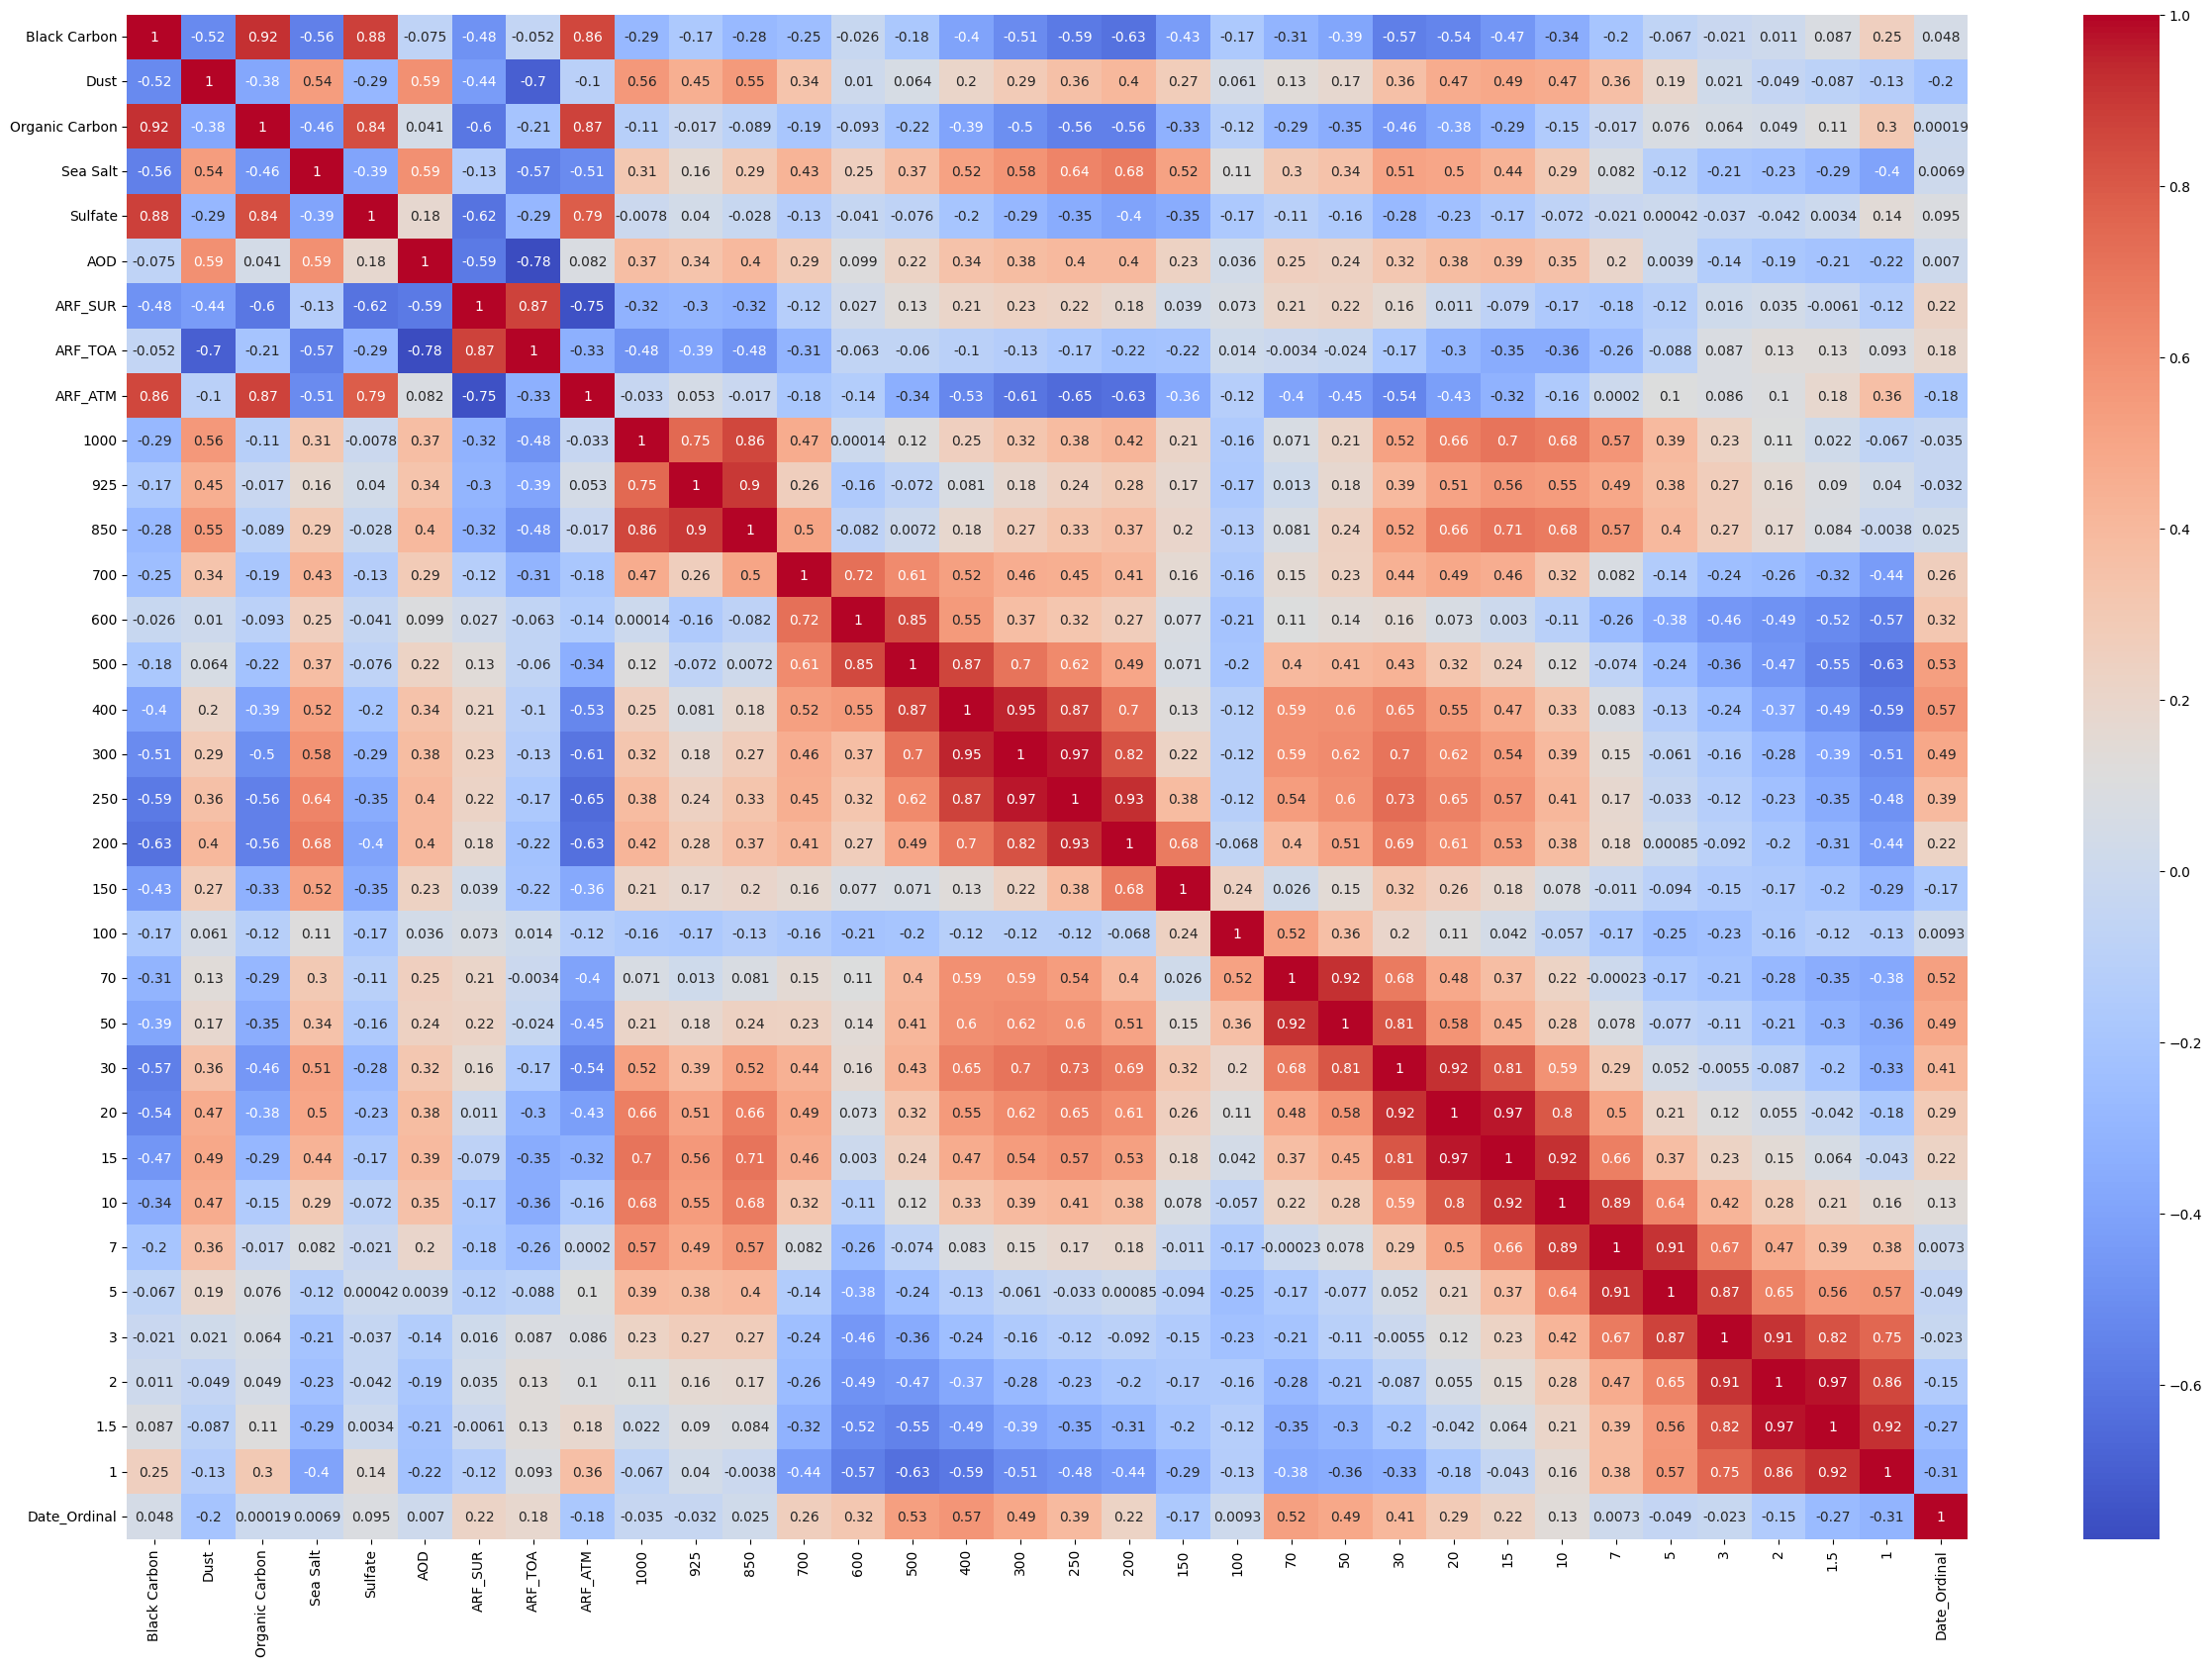

In [ ]:
# Assuming df_modified is your DataFrame
corr_matrix = df_modified.corr()

# Set the size of the heatmap
plt.figure(figsize=(30, 20))

# Plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Display the plot
plt.show()

In [8]:
df_modified = df.drop(df[df['AOD'] < -1000].index, inplace = False)

In [9]:
# Selecting features (independent variables)
X = df_modified[['Black Carbon', 'Dust', 'Organic Carbon', 'Sea Salt', 'Sulfate']]

# Target variable (dependent variable) - 'AOD'
y = df_modified['AOD']
